# China Real Estate Developers & Their Tricks You may not know

## Background Information

This project is to explore Chinese real estate developers' financial statement data and uncover what were the common tricks they leveraged to cover up their high debt loads on their financial statements before the Three Red Lines policy was enforced by the central government in the Aug of 2020. To give some  background information, due to the fast increase in borrowing by real estate developers to compete for land resources, the real estate industry has become an extremely high-indebted industry with a scary leverage ratio over the past decade. When the economy was running at its prime time with an easy money policy and high GDP growth rate in the past, real estate developers enjoyed prosperity and could source external financing at low-interest costs, and did refinancing to extend their payback period. However, particularly during 2019– 2020, the China economy was firstly hit by the trade war initiated by the Trump government, and then further dented by the outbreak of the COVID-19 pandemic. Even though the China economy had been through a lot of ups and downs during that period, the real estate sector is still playing a significant role in promoting China's economy, one of many reasons is the real estate sector has many close ties to other sectors such as banking, commodity (e.g., Steel & Concrete), manufacturing (e.g., home appliance) and transportation. The development of the real estate sector can cause knock-on effects either in a good or bad way to other industries.

Therefore, in order to contain the spread of financial risk due to high leverage and high debt problem that surfaced under the current low GDP growth rate environment, Beijing decided to enforce the Three Red Lines policies to contain the financial risk. Here are the details of the policy
1. 70% ceiling on liabilities to assets, excluding advance proceeds from projects sold on contract
2. 100% cap on net debt to equity,
3. Cash to short-term borrowing ratio of at least one.
Developers will be categorized based on how many limits they breach and their debt growth will be capped accordingly. If a firm passes all three, it can increase its debt by a maximum of 15% in the next year. However, developers will be restricted to the access of financing if they breach any one of the three limits.
In the near term, a developer with a weak balance sheet and sizable exposure to second-tier cities may need to cut home prices to boost sales and shore up cash. This was evident in Evergrande's campaign last year to offer discounts of as much as 30% - its deepest cuts ever. It may also spur waves of equity sales and spinoffs of non-core businesses such as property management services; Evergrande is already disposing of assets and spinning off affiliates. Longer-term, it may force developers to devote more resources to non-residential property, such as office and retail.

## Project Goal

You might think that the project goal will be evolving around the Three Red Line Polices. Not necessarily, there has been a lot of coverage by popular financial news outlets such as CNBC, FT, and WSJ. Also, simply calculating these financial ratios actually does not drive useful insights. What I am going to do is to use the past financial statement data of 116 property developers to get more insights such as those common tricks they leveraged to cover up their high debt loads to shareholders and also give you some heads-up about what is a better way to analyze their financial data besides calculating those financial ratios. Having a good command of financial ratio analysis definitely can help an analyst go further and deliver actionable insights. However, in reality, their accounting practices seem much more complicated and convoluted. That is the reason why a deep dive into a given industry is definitely necessary for  being a good data analyst.

## Data Description

Overall, the data contains three-year financial data (2017, 2018, and 2019) of 116 listed real estate developers. This dataset contains a number of variables as followed. All accounting items are in the unit of RMB 100 million.

- `Sec_Code`: the security code of the listed real estate developer.
- `Sec_Name`: the company name
- `Cash_From_Customers`:  how much cash proceeds have been received from customers. This is a key indicator to evaluate a developer's sales & marketing ability to drive sales. To give you a heads-up. In China, some customers buy a new property that is still in construction and will be completed within 1 or 2 years. Typically speaking, another important alternative indicator called contract sales would be used to analyze cash received from customers, but this dataset does not cover it.
- `NetCF_from_Operating`: cash flow from net operating activity 
- `NetCF_fromInvesting`: cash flow received from inveting activity 
- `Proceeds_FromBorrowing`: how much cash received from borrowers, most are banks or other financial institutions.
- `Proceeds_FromBondIssues`: how much cash received from issuing bonds
- `Dividend&InterestPaid`: how much dividend a real estate developer has distributed in a fiscal year.
- `NetCF_from_Financing`: how much cash received from financing activity 
- `Provision_InventoryDepreciation`: provision charged on unsold property. This is an interesting indicator. Typically if a newly built property cannot be sold, it will be counted as an inventory unit on accounting book and depreciation provision charges will be applied. A good real estate developer should has high turnover to sell newly built properties as soon as possilbe to avoid such charge.
- `Operating_Revenue`: how much revenues generated through core business activity
- `Bills_Payable`: any bills that are payable to banks or other financial institutions. Usually bills payable are short-term debt 
- `A/C_Payable`: short term debt to suppliers
- `Total_CI`: total comprehensive income
- `CI_For_Non_Controlling_Ints`: comprehensive income for non-controlling interests
- `NonControling_Interests`: non-controlling interests from minority shareholders in equity
- `Total_Equity`: total equity on the shareholders' equity statement

In [7]:
# Import package and link to Google Drive
!pip install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.dates as mdates
import requests
import re
xfmt = matplotlib.dates.DateFormatter('%Y-%M') 

# from google.colab import drive
# drive.mount('/content/drive')

data_link = 'Property_Developers-_Financial_Data.xlsx'
# data_link = '/content/drive/MyDrive/Rhodium Data Case Analysis/Property_Developers-_Financial_Data.xlsx'

# import the data as dataframe
df = pd.read_excel(data_link)

# skip the first two rows which are empty rows
df = df.iloc[:-2,:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing

- You can see that the columns and security codes are not in English. Therefore I would clean up these columns and transalate them into English

In [8]:
df.head(5)

,证券代码,证券简称,销售商品、提供劳务收到的现金\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,销售商品、提供劳务收到的现金\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,销售商品、提供劳务收到的现金\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,经营活动产生的现金流量净额\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,经营活动产生的现金流量净额\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,经营活动产生的现金流量净额\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,投资活动产生的现金流量净额\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,投资活动产生的现金流量净额\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,投资活动产生的现金流量净额\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,取得借款收到的现金\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,取得借款收到的现金\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,取得借款收到的现金\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,发行债券收到的现金\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,发行债券收到的现金\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,发行债券收到的现金\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,分配股利、利润或偿付利息支付的现金\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,分配股利、利润或偿付利息支付的现金\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,分配股利、利润或偿付利息支付的现金\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,筹资活动产生的现金流量净额\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,筹资活动产生的现金流量净额\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,筹资活动产生的现金流量净额\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,存货跌价准备合计\n[报告期] 2017年报\n[报表类型] 合并报表\n[数据类别] 期末数\n[单位] 亿元,存货跌价准备合计\n[报告期] 2018年报\n[报表类型] 合并报表\n[数据类别] 期末数\n[单位] 亿元,存货跌价准备合计\n[报告期] 2019年报\n[报表类型] 合并报表\n[数据类别] 期末数\n[单位] 亿元,营业收入\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,营业收入\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,营业收入\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,应付票据\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,应付票据\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,应付票据\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,应付账款\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,应付账款\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,应付账款\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,综合收益总额\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,综合收益总额\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,综合收益总额\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元↓,归属于少数股东的综合收益总额\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,归属于少数股东的综合收益总额\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,归属于少数股东的综合收益总额\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,少数股东权益\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,少数股东权益\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,少数股东权益\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元,所有者权益合计\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 亿元,所有者权益合计\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 亿元,所有者权益合计\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 亿元
0,000002.SZ,万科A,3684.0522,3981.4827,4327.3596,823.2283,336.1818,456.8681,-516.1323,-673.6444,-286.2673,945.7577,960.5299,790.1691,106.2040,389.8279,146.0343,191.3438,402.4934,368.2291,552.6490,447.9765,-333.3821,16.1321,23.1285,29.9009,2428.9711,2976.7933,3678.9388,33.3018,NaN,9.4128,1734.3940,NaN,2672.8087,370.0786,462.7901,556.8487,91.1737,151.3818,162.2047,539.9862,798.5660,825.2062,1866.7394,2356.2073,2705.7912
1,600048.SH,保利地产,2084.6068,2697.7666,2820.3877,-292.9586,118.9332,391.5532,-169.5072,-134.5917,-104.9837,1141.5834,1283.3437,1024.1795,NaN,115.0393,NaN,152.6515,214.0055,233.2887,673.9758,464.9775,-28.3465,2.2857,26.6283,37.0290,1463.0624,1945.1384,2359.3356,13.5747,46.3686,78.2756,454.5682,460.4947,1053.2535,199.3692,260.4452,376.2227,40.5131,72.4542,95.9496,512.5987,645.7184,735.0006,1582.3967,1864.9436,2295.2201
2,600606.SH,绿地控股,3577.1082,4190.2517,4417.3297,588.6255,421.7243,192.6146,-144.3337,-107.7455,-155.1944,1141.5877,1105.3938,1428.0528,85.3076,176.0572,167.9802,204.6868,197.4519,206.2326,-366.1896,-269.0098,50.3390,19.7901,22.4187,43.4621,2901.7415,3484.2646,4278.2271,44.1095,85.2302,111.5715,1346.4142,1655.5034,1996.2397,139.3691,145.1106,199.5716,45.0247,46.6718,62.3357,309.2258,388.2155,524.9111,934.5183,1089.2585,1313.9230
3,001979.SZ,招商蛇口,810.7121,1013.0095,1259.3288,-47.0869,104.7814,138.1207,-326.5688,29.5523,-131.5807,613.5369,714.9775,971.3492,73.9737,88.9963,NaN,86.5564,113.2042,141.5030,337.8291,8.5095,162.4829,1.1802,11.5218,36.0643,754.5468,882.7785,976.7218,11.8542,0.3437,1.0639,217.6866,260.1253,354.0310,147.0905,196.7845,188.7201,27.8280,42.2355,28.2720,244.1468,329.5398,1325.2498,927.8271,1088.6268,2273.7047
4,600383.SH,金地集团,662.4856,619.5130,786.3716,-69.8873,-18.2844,78.9928,7.4574,-52.1112,-96.4071,223.4298,221.7870,342.4379,98.4908,224.9392,NaN,59.4117,67.6578,80.2837,124.7061,213.3007,51.1

In [9]:
# Split the column by \n 
columns_splits = [i.split('\n') for i in df.columns]
columns_splits[:5]

[['证券代码'],
 ['证券简称'],
 ['销售商品、提供劳务收到的现金', '[报告期] 2017年报', '[报表类型] 合并报表', '[单位] 亿元'],
 ['销售商品、提供劳务收到的现金', '[报告期] 2018年报', '[报表类型] 合并报表', '[单位] 亿元'],
 ['销售商品、提供劳务收到的现金', '[报告期] 2019年报', '[报表类型] 合并报表', '[单位] 亿元']]

In [10]:
# we would get accoutning items from the column
columns_items = [i[0] for i in columns_splits]
columns_items =  pd.Series(columns_items).unique()
print(columns_items)

# Get fiscal year from the column titles
columns_years = [i[1].strip("[报告期]").strip("年").strip() for i in columns_splits if len(i)>=2]
columns_years = pd.Series(columns_years).unique()
print(columns_years)

# Get the monetary unit of accouting items
target = '[单位] 亿元'
columns_units = []
for k in [i for i in columns_splits if len(i)>=2]:
    if target in k:
        columns_units.append(target)
        
print(set(columns_units))

['证券代码' '证券简称' '销售商品、提供劳务收到的现金' '经营活动产生的现金流量净额' '投资活动产生的现金流量净额'
 '取得借款收到的现金' '发行债券收到的现金' '分配股利、利润或偿付利息支付的现金' '筹资活动产生的现金流量净额' '存货跌价准备合计'
 '营业收入' '应付票据' '应付账款' '综合收益总额' '归属于少数股东的综合收益总额' '少数股东权益' '所有者权益合计']
['2017' '2018' '2019']
{'[单位] 亿元'}


In [11]:
# translate the accounting itesm into English
English_name = ['Sec_Code','Sec_Name','Cash_From_Customers','NetCF_from_Operating','NetCF_fromInvesting',\
                'Proceeds_FromBorrowing','Proceeds_FromBondIssues','Dividend&InterestPaid',\
                'NetCF_from_Financing','Provision_InventoryDepreciation',"Operating_Revenue",'Bills_Payable','A/C_Payable','Total_CI',
                'CI_For_Non_Controlling_Ints','NonControling_Interests','Total_Equity']

# Map the english names and the column names of raw dataset
mapping = dict(zip(columns_items,English_name))
columns_items_eng = pd.Series(columns_items).map(mapping).values

In [12]:
multi_index = pd.MultiIndex.from_product([columns_items_eng[2:].tolist(), columns_years.tolist()])

df2 = df.set_index(['证券代码','证券简称']).copy()

In [13]:
# Assign the multi-level columns to the original columns
df2.columns = multi_index
# Then we can stack the table, to adjust the first-level of columns to the index
df3 = df2.stack().copy()
# Rename index names
df3.index.names = ['Sec_Code','Sec_Name','Year']

In [14]:
# Now the table has be a tabluated structured table
df3.head(5)

A/C_Payable  Bills_Payable  ...  Total_CI  Total_Equity
Sec_Code  Sec_Name Year                              ...                        
000002.SZ 万科A      2017    1734.3940        33.3018  ...  370.0786     1866.7394
                   2018          NaN            NaN  ...  462.7901     2356.2073
                   2019    2672.8087         9.4128  ...  556.8487     2705.7912
600048.SH 保利地产     2017     454.5682        13.5747  ...  199.3692     1582.3967
                   2018     460.4947        46.3686  ...  260.4452     1864.9436

[5 rows x 15 columns]

- Prepare a list of english Name for Each Real Estate Developer

In [15]:
english_name = ['China Vanke Co., Ltd. (000002.SZ)',
 'Poly Developments and Holdings Group Co., Ltd. (600048.SS)',
 'Greenland Holdings Corporation Limited (600606.SS)',
 'China Merchants Shekou Industrial Zone Holdings Co., Ltd. (001979.SZ)',
 'Gemdale Corporation (600383.SS)',
 'China Fortune Land Development Co., Ltd. (600340.SS)',
 'Seazen Holdings Co., Ltd (601155.SS)',
 'RiseSun Real Estate Development Co.,Ltd (002146.SZ)',
 'Jinke Property Group Co., Ltd. (000656.SZ)',
 'Beijing Capital Development Co., Ltd. (600376.SS)',
 'Shanghai Lujiazui Finance & Trade Zone Development Co., Ltd. (900932.SS)',
 'Jiangsu Zhongnan Construction Group Co., Ltd. (000961.SZ)',
 'Shanghai Shimao Co., Ltd. (600823.SS)',
 'Yango Group Co., Ltd (000671.SZ)',
 'Sichuan Languang Development Co., Ltd. (600466.SS)',
 'Financial Street Holdings Co., Ltd. (000402.SZ)',
 'Hangzhou Binjiang Real Estate Group Co.,Ltd (002244.SZ)',
 'Grandjoy Holdings Group Co., Ltd. (000031.SZ)',
 'Huafa Industrial Co.,Ltd.Zhuhai (600325.SS)',
 'Tianjin Guangyu Development Co., Ltd. (000537.SZ)',
 'China Enterprise Company Limited (600675.SS)',
 'Beijing Urban Construction Investment & Development Co., Ltd. (600266.SS)',
 'Cinda Real Estate Co., Ltd. (600657.SS)',
 'DIMA HOLDINGS Co. ,Ltd. (600565.SS)',
 'Xinhu Zhongbao Co.,Ltd. (600208.SS)',
 'Nanjing Gaoke Company Limited (600064.SS)',
 'Beijing North Star Company Limited (601588.SS)',
 'Rongan Property Co.,Ltd. (000517.SZ)',
 'Tahoe Group Co.,Ltd (000732.SZ)',
 'Shanghai Lingang Holdings Co.,Ltd. (900928.SS)',
 'Shanghai Lingang Holdings Co.,Ltd. (600848.SS)',
 'Shanghai Jinqiao Export Processing Zone Development Co., Ltd. (900911.SS)',
 'Black Peony (Group) Co., Ltd. (600510.SS)',
 'Suning Universal Co.,Ltd (000718.SZ)',
 'Zhongtian Financial Group Company Limited (000540.SZ)',
 'CCCG Real Estate Corporation Limited (000736.SZ)',
 'Greattown Holdings Ltd. (900940.SS)',
 'Greattown Holdings Ltd. (600094.SS)',
 'Macrolink Culturaltainment Development Co., Ltd. (000620.SZ)',
 'China Union Holdings Ltd. (000036.SZ)',
 'Guangdong Shirongzhaoye Co., Ltd. (002016.SZ)',
 'Bright Real Estate Group Co., Limited (600708.SS)',
 'Suzhou New District Hi-Tech Industrial Co.,Ltd (600736.SS)',
 'Shenzhen Zhenye (Group) Co.,Ltd. (000006.SZ)',
 'Jiangsu Phoenix Property Investment Company Limited (600716.SS)',
 'Shanghai Industrial Development Co.,Ltd (600748.SS)',
 'Shenzhen Properties & Resources Development (Group) Ltd. (000011.SZ)',
 'Shenzhen Properties & Resources Development (Group) Ltd. (200011.SZ)',
 'Huayuan Property Co.,Ltd. (600743.SS)',
 'Ningbo Fuda Company Limited (600724.SS)',
 'Shunfa Hengye Corporation (000631.SZ)',
 'Shanghai SMI Holding Co., Ltd (600649.SS)',
 'Beijing Vantone Real Estate Co., Ltd. (600246.SS)',
 'Shanghai Wanye Enterprises Co.,Ltd (600641.SS)',
 'Sundy Land Investment Co., Ltd. (600077.SS)',
 'Gree Real Estate Co., Ltd. (600185.SS)',
 'Metro Land Corporation Ltd. (600683.SS)',
 'Shanghai Zhangjiang Hi-Tech Park Development Co., Ltd. (600895.SS)',
 'Shenzhen Special Economic Zone Real Estate & Properties (Group) Co., Ltd. (000029.SZ)',
 'Shenzhen Special Economic Zone Real Estate & Properties (Group) Co., Ltd. (200029.SZ)',
 'Citychamp Dartong Co., Ltd. (600067.SS)',
 'Hefei Urban Construction Development Co., Ltd (002208.SZ)',
 'Wolong Real Estate Group Co.,Ltd. (600173.SS)',
 'Shandong Xinneng Taishan Power Generation Co.,Ltd. (000720.SZ)',
 'Shenzhen New Nanshan Holding (Group) Co., Ltd. (002314.SZ)',
 'Shenzhen HeungKong Holding Co.,Ltd (600162.SS)',
 'Everbright JiabaoCo.,Ltd. (600622.SS)',
 'Cosmos Group Co., Ltd. (002133.SZ)',
 'Tande Co., Ltd. (600665.SS)',
 'China Wuyi Co., Ltd. (000797.SZ)',
 'Hubei Fuxing Science and Technology Co.,Ltd (000926.SZ)',
 'Lushang Health Industry Development Co.,Ltd. (600223.SS)',
 'Beijing Electronic Zone Investment and Development Group Co., Ltd. (600658.SS)',
 'Deluxe Family Co., Ltd. (600503.SS)',
 'Chongqing Yukaifa Co., Ltd (000514.SZ)',
 'Shanghai Shibei Hi-Tech Co.,Ltd. (900902.SS)',
 'Shanghai Shibei Hi-Tech Co.,Ltd. (600604.SS)',
 'Guangzhou Pearl River Industrial Development Co., Ltd. (600684.SS)',
 'Sanxiang Impression Co., Ltd. (000863.SZ)',
 'Tianjin Tianbao Infrastructure Co., Ltd. (000965.SZ)',
 'Tianjin Realty Development (Group) Co., Ltd. (600322.SS)',
 'Nanjing Chixia Development Co., Ltd. (600533.SS)',
 'Tianjin Jinbin Development Co., Ltd. (000897.SZ)',
 'Shenzhen Centralcon Investment Holding Co., Ltd. (000042.SZ)',
 'Aoyuan Beauty Valley Technology Co., Ltd. (000615.SZ)',
 'China Sports Industry Group Co., Ltd. (600158.SS)',
 'Tibet Urban Development and Investment Co.,LTD (600773.SS)',
 'Guangzhou Yuetai Group Co., Ltd. (600393.SS)',
 'Rongfeng Holding Group Co.,Ltd. (000668.SZ)',
 'Beijing Dalong Weiye Real Estate Development Co.,Ltd (600159.SS)',
 'CASIN Real Estate Development Group Co., Ltd. (000838.SZ)',
 'Changchun jingkai Group Co., Ltd (600215.SS)',
 'Jinan High-tech Development Co., Ltd. (600807.SS)',
 'DongGuan Winnerway Industry Zone LTD. (000573.SZ)',
 'China Calxon Group Co., Ltd. (000918.SZ)',
 'Shang Hai Ya Tong Co., Ltd. (600692.SS)',
 'BEH-Property Co., Ltd (600791.SS)',
 'Shahe Industrial Co., Ltd (000014.SZ)',
 'Cred Holding Co.,Ltd (600890.SS)',
 'Beijing Zodi Investment Co., Ltd. (000609.SZ)',
 'HNA Investment Group Co., Ltd. (000616.SZ)',
 'Lvjing Holding Co., Ltd. (000502.SZ)',
 'Zhongrun Resources Investment Corporation (000506.SZ)',
 'Beijing Airport High-Tech Park Co., Ltd. (600463.SS)',
 'Yang Guang Co.,Ltd. (000608.SZ)',
 'Tieling Newcity Investment Holding (Group) Limited (000809.SZ)',
 'Langold Real Estate Co., Ltd. (002305.SZ)',
 'Myhome Real Estate Development Group Co., Ltd. (000667.SZ)',
 'HNA Innovation Co., Ltd. (900955.SS)',
 'HNA Innovation Co., Ltd. (600555.SS)',
 'Jiangsu Dagang Co., Ltd. (002077.SZ)',
 'Shanghai New Huang Pu Industrial Group Co., Ltd. (600638.SS)',
 'Tianjin Songjiang Co., Ltd. (600225.SS)',
 'Yunnan Metropolitan Real Estate Development Co.Ltd (600239.SS)',
 'HNA Infrastructure Investment Group Co., LTD (600515.SS)',
 'Neoglory prosperity Inc. (002147.SZ)']

sec_code = df['证券代码'].values


assert len(sec_code) == len(english_name)

In [16]:
regex = re.compile(r'\(\d+\.\w{2}\)')
engnames = english_name.copy()

for idx, i in enumerate(engnames):
    engnames[idx] = regex.sub('',i).strip()

# Create a mapping to map the English Names
name_mapping = dict(zip(sec_code,engnames))

# Create a Pandas Series for inserting into the dataframe directly
English_Names = pd.Series(df3.index.get_level_values(0).tolist()).map(name_mapping)

# assign the same index as df3 such that we can easily combine two dataframes
English_Names.index = df3.index

# assign the English name to each real estate developers
df3['EngNames'] = English_Names 

## Data Exploration

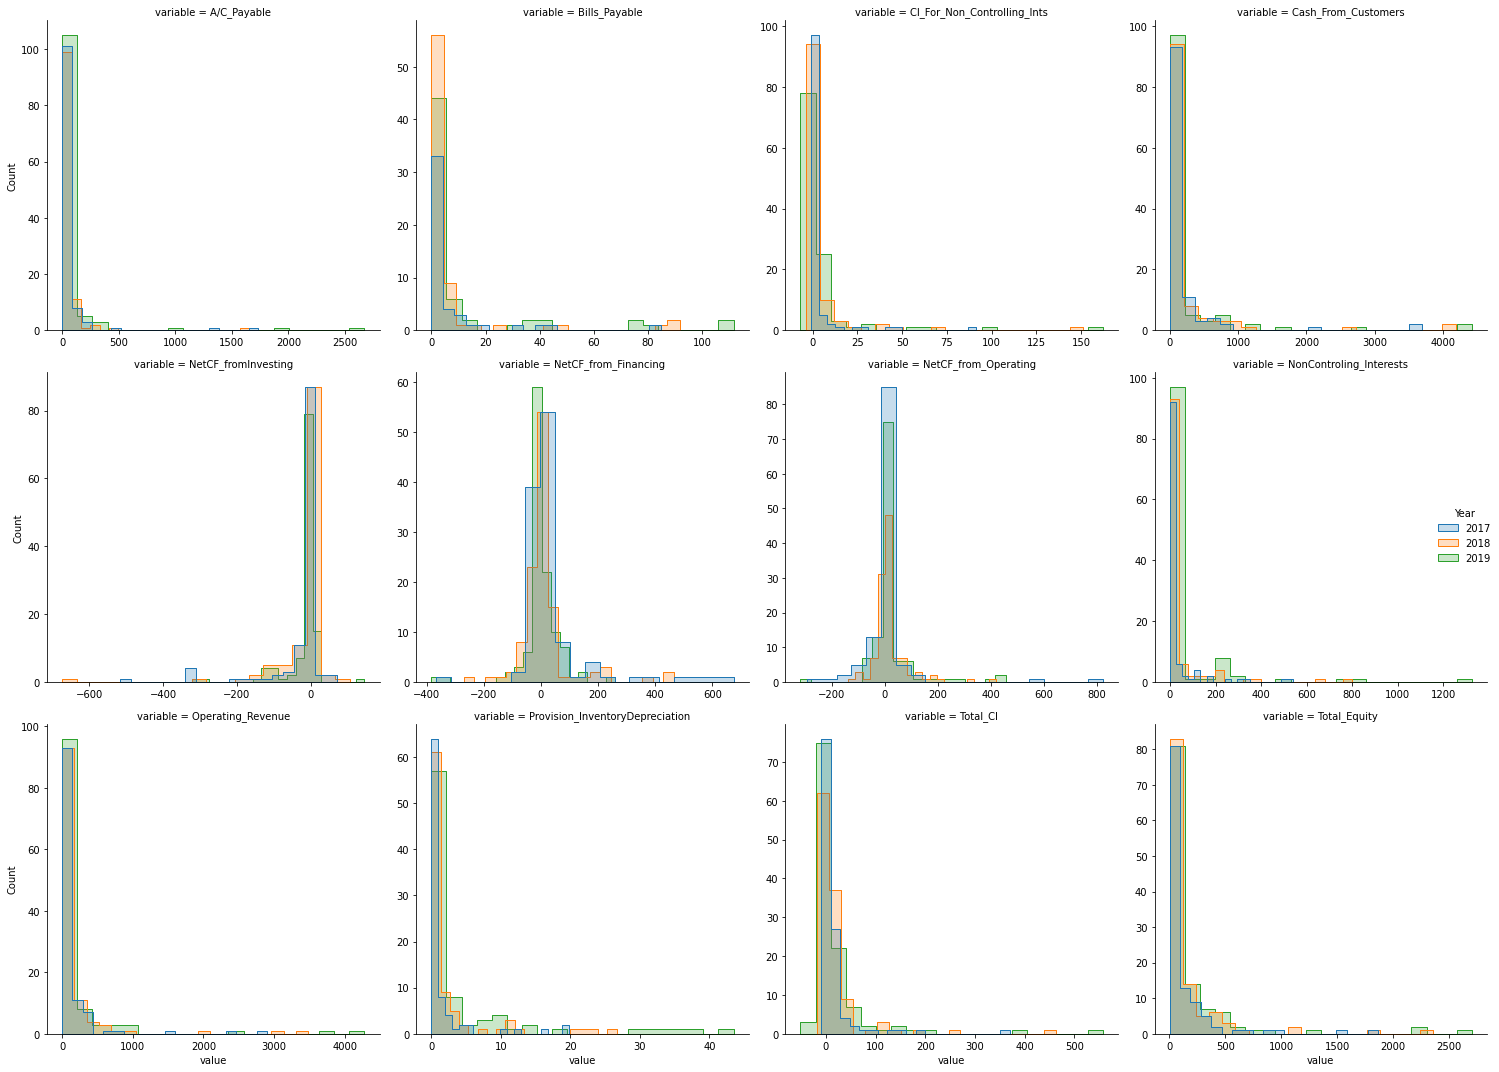

In [17]:
## Data Distribution before filling missin values
import matplotlib.pyplot as plt
import seaborn as sns

# convert the data frame from wide form into long form for visualization
df_long = pd.melt(df3.reset_index(), id_vars= ['Sec_Code', 'Sec_Name', 'Year'] )

# As we can see that, we are not going to use all variables but there are some key variables we need to look into
key_columns = ['A/C_Payable', 
               'Bills_Payable', 
               'CI_For_Non_Controlling_Ints',
               'Cash_From_Customers',
               'NetCF_fromInvesting', 
               'NetCF_from_Financing', 
               'NetCF_from_Operating',
               'NonControling_Interests',
               'Operating_Revenue',
               'Provision_InventoryDepreciation',
               'Total_CI',
               'Total_Equity'
               ]

# only get the variables we want ot analyze into a single dataframe
df_trunc = df_long.loc[df_long.variable.isin(key_columns)]

sns.displot(data = df_trunc, 
            col='variable', x='value', hue='Year', 
            kind='hist', 
            palette='tab10', 
            bins = 20,
            stat="count", 
            element='step',
            col_wrap = 4, 
            common_bins=False,
            facet_kws={'sharex': False, 'sharey': False}
            )

plt.tight_layout()
plt.show()



There are some takeaways we can get from the distribution charts. For example, in 2019, the distribution of these accounting variables are either higher right-skewed (Total equity) or left-skewed (Cash flow from investing). This makes sense as we are aggregating these 116 developers' accounting information, regarding them as industry level. In the real estate sector, the "Winner Takes All" model does exist. If a developer has a strong financial position, it can easily raise funds from external sources and aggressively bid for valuable land resources to the local government. Also with the strong financial position, real estate developers can easily build up close ties with local government to negotiate. All these factors somehow cultivate the "Winner Takes All" model in China's real estate sector.

### Fill in the missing data

There are some key variables from which we can see some `Nan` value in the dataframe. Fortunately, we don't have a lot of missing values in these columns. Also as these columns are fundamental financial data, they are to some extent correlated to each other.

With a basic understanding of the accounting data, one of the best ways is to fill in the missing value with the ratio method. For example, if A/C payable is highly correlated with Operating Revenue (In fact, it is because A/C payable is positively related to sales. If more sales activities occurred, A/C payable will also increase but necessarily at the same pace but should show the same trend). If we want to fill in the missing value in 2019, we can compute the ratio of A/C Payable to Operating Revenues in 2018 and then apply the ratio in 2019 by multiplying it with its Operating Revenues in 2019 to backward calculate the estimated A/C payables of 2019.

One of the reasons I believe SimpleLiinearRegression does not work to help us to predict the missing values here is first of all our dataset is relatively small, we only have 3-year data for 116 developers (in total, only 348 data points). Secondly, If we are going to apply Linear Regression, it is inevitable we have to build up our linear regression either across all developers' data in the same year or the same developer with three-year data. Either this way has high multi-collinearity. For example, companies in the same industry definitely will be impacted by the same policy. Also, they have competing relationships (one rises up, the other might decline) in the market as well.

We can also increase the robustness of this ratio, by taking the average of the other two years' data as well. For example, we can take the average of both 2017 and 2018 and apply the ratio method to fill in missing values in 2019.

In [18]:
# Check out the missing values
missing_cols = df3.isnull().sum()

# calculate the correlation marix to identify which column has the high correlation with target column
corr_matrix = df3.corr()

# base on the result of corr_matrix, we can clearly define which other columnn might be helpful to predict missing values
fill_col = {
    'A/C_Payable':'Operating_Revenue',
    'Bills_Payable':'Operating_Revenue',
    'CI_For_Non_Controlling_Ints':'Total_CI',
    'NonControling_Interests':'Total_Equity',
    'Provision_InventoryDepreciation':0,
    'Total_CI': 'Total_Equity'
}

# df3.groupby(list(df3.index.names[:2])).apply(lambda x: x['A/C_Payable']/x['Operating_Revenue'] )

# if there are missing values in the column, we use the ratio method to fill in the missing values
for col in key_columns:
    # if we don't have missing values, bypass the column
    if missing_cols[col] == 0:
        continue
    else:
        df_temp = df3.copy()
        if isinstance(fill_col[col],str):
            # calculate the ratio dataframe
            df_temp['Ratio'] = df_temp[col]/df_temp[fill_col[col]]

            # and then group by sec_code and sec_name to take the yearly average
            ratio = df_temp.groupby(list(df_temp.index.names[:2]))['Ratio'].mean()

            # get the dataframe which contains mssing values
            df_missing = df3.loc[df3[col].isnull(),col]

            # iterate each row to find the missing values and compute the value we want to fill in
            for row in df_missing.iteritems():
                # compute the value that we need to use 
                value = ratio.loc[(row[0][0], row[0][1])] * df3.loc[row[0], fill_col[col]]

                # if value is not NaN
                if value:
                    # if estimated value is lower than 0, we cap at zero 
                    df3.loc[row[0],col] = max(0,value)
                # otherwise, we fill in with 0 
                else:
                    df3.loc[row[0],col] = 0

        else: 
            # if we dont define any column as denominator, we would fill in 0
            df3[col] = df3[col].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


## Goals of Analyzing Housing Developers' Financial Well-being (2017 - 2019)

Analyaizng this specific sector requires a certain degree of familiarity with the industry insights and also some understanding about how to tweak accouting information to turn it into a signal that can reflect the real accoutning performance. But in this article, I am not going to touch on complicated accouting manipulation techniques but just to understand the entire industry's situation and what we can infer/learn from the real-estate sector. In the following session, we are going to address three major questions 


1.   How was the entire real estate market changing over the three-year period.
2.   What kind of common "financial engineering" developers were leveraging to polish up their real financial position.
3.   What are the worst-performing companies, with those financial engineering things we addressed in part 2. Can we create a model that can help us to pick up the best 5 and worst 5 companies, and long top 5 and short worst 5 to see how this pseudo portfolio perform in one year period (from 2020 - 2021)?





### Q1. Market Concentration Analysis - How was the entire real estate market changing over the three-year period.

For the first level of market concentration analysis, we want to identify how many top players would capture at least 80% of total sales/cash flow from customers. As in this dataset, it does not provide sales/revenues data, therefore we will use cash flow from customers as an alternative..

Cash flow received from customers is slightly different than revenues/sales in terms of the accounting recognition period. Typically, some housing developers in China heavily rely on prepayments from customers, in which case customers pay in advance to buy a property that will be completed within the agreed period (approximately in two to three years). This prepayment will be treated as liabilities on their financial statements and will be recognized as sales/revenues when housing developers deliver units to customers. There are some reasons supporting this presale practice. First and foremost the housing market is booming and in the heated status so-called "Seller Market". Developers can leverage pre-sale arrangements to test the market demands, which is a good pricing strategy. The second reason is presale can act as an effective and zero-cost hedging tool compared with common derivative contracts. Property developers can lock in the price of a property to avert policy risk (pricing control policy enforced by local government or central government). The presale practice, on the other hand, can also assist real estate developers to raise funds with zero interest costs. For homebuyers, presale payment arrangements (usually low deposits to secure future ownership of housing units) can overcome initial payment constraints. However, does more cash flow received from customers indicate a good signal? It really depends but in some cases investors need to be more cautious because property developers might be cash-strapped and therefore would discount property prices or provide other perks such as free parking lots or lower management fees in order to get cost-free cash from customers (customers are not stupid. If there are not benefits, why would they deliver a large sum of cash around 2–3 years early before the completion of property). Also, if the speed of cash received from customers does not align with the number of units deliver to customers, there might be a risk of under-delivery. Heavy discounts would appear when real estate developers' financial well-being is under the water. For example, before the burst of China Evergrande Group's debt problem, it has applied deep discounts on its apartment sales in order to collect cash to pay back mountain loads of debts ASAP.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

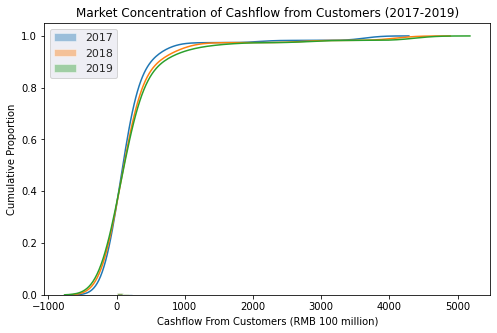

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plotting

fig, ax = plt.subplots(figsize=(8,5))

def plot_cumCurve(df, col, cumulative, title, xlabel, ylabel, ax ):
    """
    Purpose:
        Visualize the distribution curve of univariable
    Inputs:
        df (pd.DataFrame): the dataframe in which contain data you want to visualize
        col (Str): the col name that you want to visualize
        cumulative (Boolean): True - plot cumulative distribution
        title (Str): (Str): the title of the plot
        xlabel (Str): the xlabel of the plot
        ylabel (Str): the ylabel of the plot
    Outputs:
        None
    """

    sns.set('notebook')

    tmp = df3[col].reset_index()

    for Year in ['2017',"2018","2019"]:
        x = tmp.loc[tmp.Year == Year][col]
        kwargs = {'cumulative': cumulative}
        sns.distplot(x, kde_kws=kwargs, ax=ax, label = Year)  
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show();

plot_cumCurve(df = df3, col = "Cash_From_Customers",
              cumulative = True, 
              title = 'Market Concentration of Cashflow from Customers (2017-2019)',
              xlabel = 'Cashflow From Customers (RMB 100 million)',
              ylabel = 'Cumulative Proportion',
              ax = ax
              )

As you can see, the market landscape did change to some extent. You see that the blue curve (2017) from Figure 6 is more left outward than the orange and green curves. Also, the blue curve is reaching 80% of total cash received from customers much earlier than the other curves. We can imply that over the three-year period, the market is becoming more consolidated by those top market players, given that the real estate market was off the high and entering a downward trend at the time. Even the market was becoming more concentrated, the total cash received from customers still edged up year over year. Specifically, in 2017 the top 20 market plays siphoned over 80% cash from customers. When it comes to 2019, the number was down to the top 18. The declining trend of the number indicates that at the time the market was going through some struggles, and only real estate developers with a strong position and good financial well-being can show good defense when the entire marketing was declining.

In [20]:
# Market Concentration Analysis - to identify how many top players needed to achieve 80% of total cash received from customers in the entire market

# seperate dataframe by years
df_top80_17 = df3.loc[df3.index.get_level_values('Year') == '2017']
df_top80_18 = df3.loc[df3.index.get_level_values('Year') == '2018']
df_top80_19 = df3.loc[df3.index.get_level_values('Year') == '2019']

# iterate throuh all dataframes and calculate number
for df in [df_top80_17,df_top80_18,df_top80_19]:
    df = df[['Cash_From_Customers']].sort_values(by = 'Cash_From_Customers', ascending = False)
    df['Total_Cash'] = df['Cash_From_Customers'].sum()
    df['RuningPct'] = df['Cash_From_Customers'].cumsum() / df['Total_Cash']
    df.index = range(1, df_top80_17.shape[0]+1)
    print(df.head(25))


    Cash_From_Customers  Total_Cash  RuningPct
1             3684.0522  21435.2887   0.171869
2             3577.1082  21435.2887   0.338748
3             2084.6068  21435.2887   0.435999
4              810.7121  21435.2887   0.473821
5              780.4940  21435.2887   0.510232
6              662.4856  21435.2887   0.541138
7              642.3031  21435.2887   0.571103
8              573.6563  21435.2887   0.597865
9              554.8713  21435.2887   0.623751
10             549.6122  21435.2887   0.649392
11             516.7662  21435.2887   0.673500
12             491.7953  21435.2887   0.696443
13             359.1555  21435.2887   0.713199
14             324.0137  21435.2887   0.728315
15             281.4625  21435.2887   0.741445
16             235.8551  21435.2887   0.752448
17             216.3725  21435.2887   0.762543
18             208.0211  21435.2887   0.772247
19             204.0063  21435.2887   0.781765
20             199.1571  21435.2887   0.791056
21           

In [21]:
df_CFfromCust = df3.groupby(df3.index.get_level_values('Year'))['Cash_From_Customers'].sum().to_frame()
df_CFfromCust['pct_change'] = df_CFfromCust['Cash_From_Customers'].pct_change()
df_CFfromCust


,Cash_From_Customers,pct_change
Year,,
2017,21435.2887,NaN
2018,25746.8596,0.201144
2019,28260.1175,0.097614


As you can see that, total cash received from customer logged a positve growth rate, at 20% from 2017 to 2018. However in 2019, the grow rate was shrinking to just only 9.7%. What was really happening at the time from 2018 to 2019?

Another metircs we can use to analyze market situation is to rank developers based on cash received from customers. My prior assumption is that over the three years, the rank of top markets players would not change drastically but the small and meidum real estate developers would go through some ups and downs over this three year period.

In [22]:
# reset index and then assign rank of cash received from customer to each firm in each year. 
# higher cash received will get a lower rank like 1 or 2 
df3 = df3.reset_index()
df3['RankCashFromCust'] = df3.groupby(["Year"])['Cash_From_Customers']\
            .rank(ascending = False, method = 'dense')

In [23]:
def quintiles(inser):
    # inser is a pd.Series not a dataframe
    """
    Purpose: divide a an array into 5 quintiles based on a given numerical variable
    Input: pd.series or array 
    Output: pd.series with five labels: 1,2,3,4,5
    """
    ouster = pd.qcut(inser, q= 5, labels = range(1,6))
    return ouster

# group by Year and diivid firm five quintiles based on their total equity
df3['Bin_Equity'] = df3.groupby('Year')['Total_Equity'].apply(quintiles)

# calculate the rank standard deviation of each bin for each year
df_bin = df3.groupby(['Year','Bin_Equity'])['RankCashFromCust'].std().reset_index()

# rename columns for visualization
df_bin.columns = ['Year', 'Total Equity', 'Rank Standard Deviation']

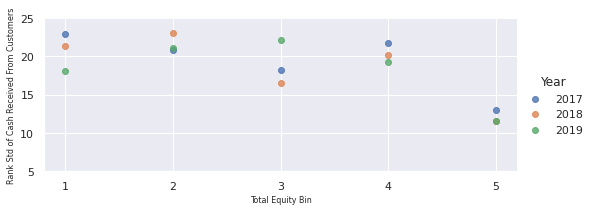

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb

# specify the order of colors
g = sb.FacetGrid(data = df_bin, hue = 'Year', aspect = 2.5)

# map the plotting function on each plot
g = g.map(sb.regplot, 
          'Total Equity', 
          'Rank Standard Deviation',fit_reg = False);

# add legend
g.add_legend(title = 'Year')

# define xtick labels and other plot properties
plt.xticks(range(1,6),[1,2,3,4,5])
plt.ylim(5, 25)
plt.xlabel('Total Equity Bin',fontsize = 8)
plt.ylabel('Rank Std of Cash Received From Customers', fontsize = 8)
plt.show()

- You can clearly observe that over the three-year period, firms at higher bins (Bin 5 with high equity) shows much lower standard deviation of rank in cash received from customers, which indicates that their market position is relatively stablized compared with those at the lower bins

## Q2. What kind of common "financial engineering" developers were leveraging to polish up their real financial position.

In [25]:
 # A/C Payble and # Bill Payable
# Does it grow at the same speed as cash received from customers or operating revenues?
# Comprehensive Income to NonControlling Interest the percantage are aligned with the NonControllingInterest/Total Equity
# What we can infer from the provision of InventroyDepreciation
# Distance between Total Net Cashflow and Operating Cashflow

### Tricks from A/C payable & Bill payable

- A/C payables & Bill payables are short-term financings that real estate developers would leverage. In China real estate market, developers usually have strong negotiation power to put the payment on hold to suppliers until properties have been completed. Therefore when the liquidity becomes tight, developers tend to defer payment to supplies. Therefore, payables are an important source of short-term financing for developers to go around the short-term liquidity problems. By increasing payables, developers in some ways were transferring some of the liquidity pressure to suppliers.

In [26]:
df3['TotalPayables'] = df3['A/C_Payable'] + df3['Bills_Payable']

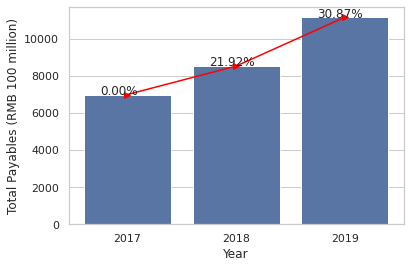

In [27]:
import seaborn as sns

def plot_barline(df,x,y,ylabel):
    """
    Purpose:
        the function is the plot the bar chart for the numerical values and the line chart for the growth rate
    Inputs:
        df (pd.DataFrame): the dataframe that contains column we want to analze
        x (str): the column by which you want to group your results
        y (str): the column on which you want to analyze
        ylabel (str): ylabel you want to put on the y-axis of the plot
    Return:
        None
    """

    df_temp = df.copy()
    df_temp2 = df.groupby(x)[y].sum().to_frame().reset_index()
    df_temp2['%Change'] = df_temp2[y].pct_change().fillna(0)

    sns.set_theme(style="whitegrid")
    base_color = sb.color_palette()[0]
    ax = sns.barplot(x=x, y=y, data=df_temp2, color = base_color)
    ax.plot(df_temp2[x], df_temp2[y], color = 'red', marker = '>')
    ax.set_ylabel(ylabel)
    for idx, p in enumerate(ax.patches):
        number = '{:.2f}%'.format(df_temp2['%Change'][idx]*100)
        x = p.get_x() + p.get_width()/2 - 0.25
        y = p.get_y() + p.get_height() + 2
        ax.annotate(number, (x, y))

    plt.show()

plot_barline(df = df3,x = 'Year', y = "TotalPayables", ylabel = 'Total Payables (RMB 100 million)')

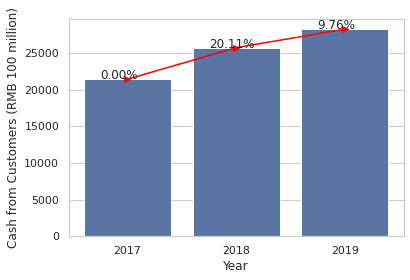

In [28]:
plot_barline(df = df3, x = 'Year', y = "Cash_From_Customers", ylabel = 'Cash from Customers (RMB 100 million)')

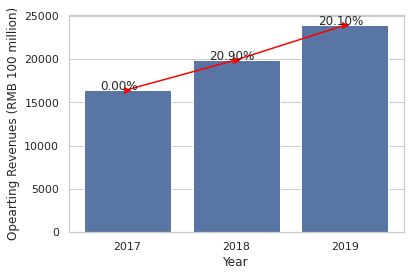

In [29]:
plot_barline(df = df3, x = 'Year', y = "Operating_Revenue", ylabel = 'Opearting Revenues (RMB 100 million)')

As you can see from 2017 to year 2018, payables in the dataset increased by 22% and then the trend accelerated to 31% from year 2018 to 2019. This indicates that at the time market was facing liquidity problem issue, which is supported by the relatively slow growth rate in operating revenues (20.10%) and cash received from customers (9.76%). Cash indicators I believe will be more reliable as firstly it does not contains any accrual items and has lesser leeway to manipulate than operating revenues.

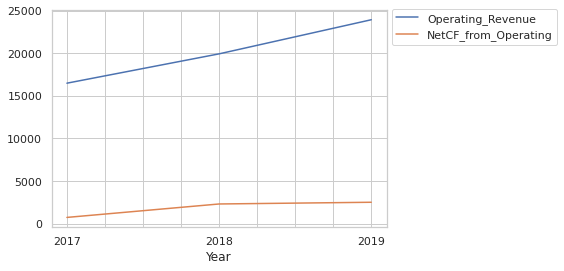

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

df3.groupby('Year')[['Operating_Revenue','NetCF_from_Operating']].sum().plot()
plt.legend(bbox_to_anchor = (1,1.03))
plt.show()


Also, if we look at the line plots for operating revenue and net cash received from operating activity, we can see the the gap between two data is widening. Operating revenues of the industry was increassing while net cashflow received from customers are decreasing. Though, this signal does not necessarily mean operating revenues were manipulated but in practice it's a good signal showing operating revenues alone cannot represent the whole picture of the firm's financial well-being.

### Off-balance sheet item - Joint Venture
The other common technique that developers leverages as mentioned is to form a joint venture with institutional or private investors, and then developers sell their shares of the joint venture to investors and guaranteed that they would buy back at a higher price. Therefore, how can we look for the signal through their accounting data? Actually, it could be complicated as typically this type of joint venture does not require full disclosure as developers usually hold less than 50% of ownership. However, we could use a relatively indirect approach by analyzing the minority interest on their financial statement.

What we are going to do is to analyze the ratio of Non-Controlling Interest over Total equity vs. the ratio of comprehensive income attributed to NCI over total comprehensive income. Logically speaking if non-controlling interests are normal and belong to equity investment, these two ratios should be very closed and aligned. However, if this non-controlling interest entity involves debt-form investment, it would complicate the situation and we can see the two ratios would be off from each other.

In [31]:
import seaborn as sns

df_bin_payables = df3.groupby(['Year','Bin_Equity'])['TotalPayables'].sum().reset_index()

def stack_bar_plot(df,x,y,hue,xlabel, ylabel):
    """
    """
    sns.barplot(x = x ,  y = y, hue = hue, data = df)
    plt.xticks(rotation = 15)
    plt.legend(bbox_to_anchor = (1,1.03)),
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [32]:
# compute the ratio of Non Controlling Interest to Total Equity Ratio
df3['NonControlInterest_TotalEquity'] = df3['NonControling_Interests']/df3['Total_Equity']

# compute the ratio of comprehensive income attributed to Non-controlling interest to total comprehensive income
df3['NonControlInterest_CompreIncome'] = df3['CI_For_Non_Controlling_Ints']/df3['Total_CI']

# extract all columns for possible joint venture deals hidden in the financil statement
df_NCI = df3[['EngNames','Bin_Equity','Year','NonControlInterest_TotalEquity', 'NonControlInterest_CompreIncome']]

# compute the absolute distance between two ratios
df_NCI['Difference'] = np.abs(df_NCI['NonControlInterest_TotalEquity'] - df_NCI['NonControlInterest_CompreIncome'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


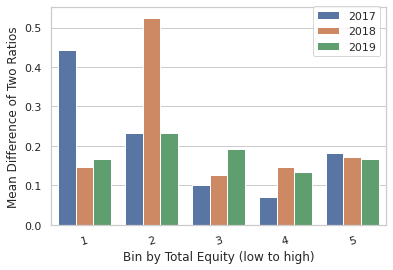

In [33]:
# Summary Statistics
df_bin_meandifference = df_NCI.groupby(['Year','Bin_Equity'])['Difference'].describe()['mean'].reset_index()

# plot the chart to show the mean difference between two ratios over three year period
stack_bar_plot(df = df_bin_meandifference,
               x = 'Bin_Equity',
               y = 'mean',
               hue = 'Year',
               xlabel = 'Bin by Total Equity (low to high)', 
               ylabel = 'Mean Difference of Two Ratios')


In order to better analyze data, we classify data into five quintiles. The higher quantile represents stronger total equity and so on. As you can see from Figure 12, bin 4 & 5 (high total equity), the ratio difference is relatively stable and much smaller than bin 1, 2, and 3. In addition, you can see that bin 5 was trending down from 2017 to 2019, while other bins were trending up. That makes sense as high total equity means a stronger balance sheet, which enables developers to have broader access to external financings such as bond issues and favorable credit terms in paying total payables, while the weaker players have more restricted access to external financing and also higher cost of borrowing. Therefore they have to do some "financial engineering" to source money from uncommon ways to either support their competition or operating activities.

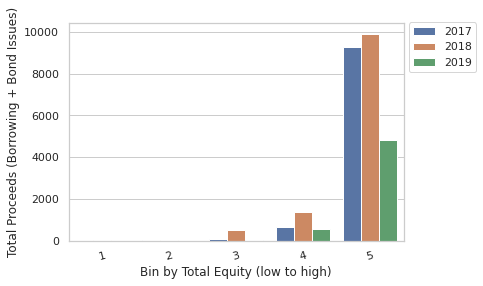

In [34]:
# Total amount of borrowing proceed
df3['TotalBorrowing'] = df3['Proceeds_FromBondIssues'] + df3['Proceeds_FromBorrowing']
df_bin_borrowing = df3.groupby(['Year','Bin_Equity'])['TotalBorrowing'].sum().reset_index()

# # plot the total borrowing amnount by bins over the three-year period
stack_bar_plot(df = df_bin_borrowing,
               x = 'Bin_Equity',
               y = 'TotalBorrowing',
               hue = 'Year',
               xlabel = 'Bin by Total Equity (low to high)',
               ylabel = 'Total Proceeds (Borrowing + Bond Issues)'
               )

You can see that developers with stronger balance sheets and equity show that they can have greater access to external financing. Over the three-year period, companies at the higher bins had raised many orders of magnitude of money through bond issues or borrowing compared with those companies at the lower bins (lower equity and smaller balance sheet)

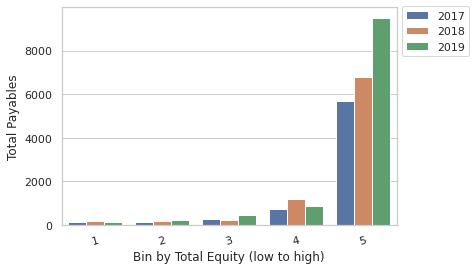

In [35]:
# calculate the data for visualization
df_bin_payables = df3.groupby(['Year','Bin_Equity'])['TotalPayables'].sum().reset_index()

# plot the total payables by bins over the three-year period
stack_bar_plot(df = df_bin_payables,
               x = 'Bin_Equity',
               y = 'TotalPayables',
               hue = 'Year',
               xlabel = 'Bin by Total Equity (low to high)',
               ylabel = 'Total Payables'
               )

This bar chart has further substantiated my argument that company with higher total equity has greater power to negotiate for the better terms of total payables with suppliers or financial institutions. Therefore, you can see the bin 5 (high total equity) shows different order of magnitude of larger total payables than lower bins over the three-year period.

# Q3. What are the worst-performing companies, with those financial engineering things we addressed in part 2. Can we create a model that can help us to pick up the best 5 and worst 5 companies, and long top 5 and short worst 5 to see how this pseudo portfolio performs in the next 6 - 9 month returns (from 2020/3/31 - 2020/12/31)?

Before we pick stocks among these developers, we need to define our criteria for stock selection. Here are some of the criteria that I addressed in previous sessions. You know that I was doing this part just for fun, if you think some factors look unreasonable, it is totally acceptable to have differing views as the best strategy does not exist in the stock market.

Factor 1: Market ranking based on cash received from customers and operating revenues should be relatively close to each other. If these two ranks are relatively stable and aligned, it signals the earning quality of such developers is credible.

Factor 2: Constant dividend & interest payout to shareholders & bondholders, the higher the payout the better company would be. This ratio represents the rate of return that bond and equity investors can earn  either through a bond or equity investments.

Factor 3: ratio of Non-controlling interest to total equity and the ratio of total comprehensive income attributed to minority shareholders should be relatively close or aligned to each other. The difference between the two ratios should be constant otherwise it indicates that the company is using joint venture financing.

Factor  4: ratio of cash received from customers to total payables should be higher, the higher the ratio the better the company can use the cash received to cover its short-term liabilities.

In [36]:
# the lower rank (smaller ranking difference between cash received from customers and operating revenues), the better the company
df3['Rank_OperatingRevenues'] = df3.groupby(["Year"])['Operating_Revenue'].rank(ascending = False, method = 'dense')
df3['RankingDifference'] = np.abs(df3['Rank_OperatingRevenues'] - df3['RankCashFromCust'])
df3['Factor1'] = df3.groupby(["Year"])['RankingDifference'].rank(ascending = True, method = 'dense')

# the lower rank (the higher payout ratio), the better the company
df3['DividendIntPayoutRatio'] = df3['Dividend&InterestPaid']/df3['Total_Equity']
df3['Factor2'] = df3.groupby(["Year"])['DividendIntPayoutRatio'].rank(ascending = False, method = 'dense')

# the ratio of non-controlling interest to total equity and the ratio of total comprehensive income attributed to minority sharehoders should be relatively stable and close to each other
# the lower rank (the smaller differnece between two ratios), the better the company
df3['NCI_ratio_difference'] = np.abs(df3['NonControlInterest_TotalEquity'] - df3['NonControlInterest_CompreIncome'])
df3['Factor3'] = df3.groupby(["Year"])['NCI_ratio_difference'].rank(ascending = True, method = 'dense')

# compute the coverage ratio, the lower the ranking (the higer the coverage, the better the company)
df3['coverage_ratio'] = df3['Cash_From_Customers']/df3['TotalPayables']
df3['Factor4'] = df3.groupby(["Year"])['coverage_ratio'].rank(ascending = False, method = 'dense')


In [37]:
# group by the company name and sec code, and then take the three-year average of each factor we calculated
df4 = df3.groupby(['Sec_Code','EngNames'])[['Factor1','Factor2','Factor3','Factor4']].mean()

# now, we compute the average of these four factors
df5 = df4.mean(axis=1).reset_index()

# renamne columns
df5.columns = ['Sec_Code', 'EngNames', 'AverageScore']

# classify the average score into 5 bins (invest into the bin 1 and short the higher bin 5)
df5['Bins'] = df5[['AverageScore']].apply(quintiles)

In [38]:
# select those stocks that only exist in the bin 1 and bin 5 for later data processing
df6 = df5[df5["Bins"].isin([1,5])]


- Now we need to get the stock price for each stock in our bins. In order to avoid looking ahead bias, we would start to invest after 3/31/2020 because typically last year annual statement would not be available until the mid of  March next year. Our investment horizon would span from 3/31/2020 to 12/31/2020 to see how our model perform during this period

In [39]:
# conver the stock code into a list
tickers = df6['Sec_Code'].tolist()

# replace the code, if the code ends with '.SH', replace it with '.SS' to align with Yahoo Finance format
tickers = [code.replace('.SH','.SS') if '.SH' in code else code for code in tickers ]
print(tickers)

# join the stock code into a string
tickers_text = " ".join(tickers)

# get the stock data spanning from 2020-03-31 to 2020-12-31
stock_data = yf.download(tickers_text, start="2020-03-31", end="2020-12-31")

['000006.SZ', '000011.SZ', '000036.SZ', '000506.SZ', '000514.SZ', '000573.SZ', '000616.SZ', '000656.SZ', '000667.SZ', '000718.SZ', '000732.SZ', '000736.SZ', '000926.SZ', '002016.SZ', '002077.SZ', '002146.SZ', '200011.SZ', '600064.SS', '600158.SS', '600159.SS', '600185.SS', '600208.SS', '600225.SS', '600246.SS', '600322.SS', '600376.SS', '600383.SS', '600393.SS', '600463.SS', '600503.SS', '600515.SS', '600533.SS', '600604.SS', '600606.SS', '600638.SS', '600641.SS', '600649.SS', '600657.SS', '600665.SS', '600684.SS', '600724.SS', '600736.SS', '600807.SS', '600823.SS', '600848.SS', '900902.SS', '900928.SS']
[*********************100%***********************]  47 of 47 completed


In [40]:
 # only get the adjusted close price for stock data
 stock_data_adj = stock_data.loc[:,('Adj Close')]

# convert stock data into accumulative return, such that we can easily visualize our portfolio return
 ret_data = stock_data_adj.pct_change().fillna(0)

In [41]:
# save the new tickers into the dataframe
df6['Sec_Code_New'] = tickers

# get stocks at the lower bin
bin1_stocks = df6.loc[df6['Bins'] == 1, 'Sec_Code_New']

# get stocks at the higher bin
bin5_stocks = df6.loc[df6['Bins'] == 5, 'Sec_Code_New']

# compute the portfolio return every day
port = ret_data[ret_data.columns[ret_data.columns.isin(bin1_stocks)]].mean(axis =1) - ret_data[ret_data.columns[ret_data.columns.isin(bin5_stocks)]].mean(axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# check the bin statistics to see if each bin has the same number of stocks
df5['Bins'].value_counts()

2    24
1    24
5    23
3    23
4    22
Name: Bins, dtype: int64

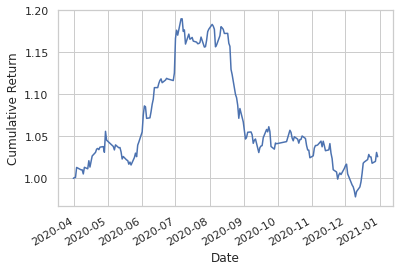

In [42]:
(port + 1).cumprod().plot()
plt.ylabel('Cumulative Return')
plt.show();

The stock-picking methodology is really risky and volatile. The portfolio performance increases by almost 20% within three months and falls to square one at the year-end of 2020. At the same time, the trading idea ignores a number of important factors. Firstly, we cannot conduct short selling in the China stock market. Second, I did not include transaction costs, taxes, and dividends which will impact portfolio performance even further. Lastly, we did not consider the possibility of executing transactions during a trading day but just at the adjusted closing price. At the same time, we know that during this period, China's economy was hit the hardest by the outbreak of COVID-19. Considering the extremely pessimistic economic situation, all industry sectors will be negatively impacted. In summary, these four factors are definitely not robust enough over time and cannot serve as good profit-generating factors at all.

## Calculate Sharpe Ratio

Also, you can see the Sharpe ratio is negative. Therefore it is not worth any penny.

In [43]:
# how many trading days in a year
trading_days = 250
# calculate the mean of daily return, daily return standard deviation
daily_mean = port.mean()
daily_std = port.std()

# get the sharpe ratio
sharpe_ratio_1 = (daily_mean - daily_std) * np.sqrt(trading_days) / daily_std

print(sharpe_ratio_1)

-15.471439291654399


## Summary

With the analysis of China real estate markets, we can get a few of takeaways:

- 1. As economy was trending down (China was inflicted by the trade war against the United States and then COVID-19, the winner will be much stronger with greater access to external financing to bid land resources.

- 2. Payables are a common a tool that developers leveraged in order to improve their financial well-being in the short term. 

- 3. We can infer joint venture financing through the ratios between comprehensive income attributed to non-controlling interests and non-controlling interest to total equity. These two ratios' trend should align if no joint venture financing involved. Companies with strong balance sheet typically would not opt for such financing sources, but weaker players tend to do so.

- 4. Even though, we know which signals are good or bad, it is still very hard to leverage those signals to develop a profitable trading model even in the paper trading. If a trading idea cannot pass paper trading, just don't even think about the real trading environment.

- 5. Obviously, our trading ideas does not include any rebalancing techniques. Given the market situation, our trade model can be improve through rebalancing. For example, we can rebalance our portfolio based on the latest finanical statement. Selling stocks that fall out of Quantile Bin 1 and Buying stocks back if they get out of Quantile bin 5 and so on.